维度： (1000, 1)


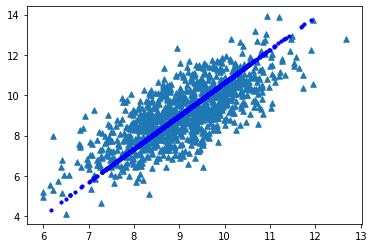

In [25]:
#..........................案例1:
#.......................... PCA(降维技术)
# 其它的降维技术还有因子分析（问卷较多）、独立成分分析（ICA）
# PCA:一旦得到了协方差矩阵的特征向量，就可以保留最大（方差最大）的N个值，第二特征值与第一个正交...依次
import numpy as np
import pandas as pd
file=r'C:\Users\Wudey\Desktop\machinelearninginaction\Ch13\testSet_PCA.txt'
dta=pd.read_table(file,header=None)
def pca(dataMat, topNfeat=9999999):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals  # 去均值
    covMat = np.cov(meanRemoved, rowvar=0) # 协方差
    eigVals,eigVects = np.linalg.eig(np.mat(covMat))
    eigValInd = np.argsort(eigVals)    # 特征值的排序
    eigValInd = eigValInd[:-(topNfeat+1):-1]  # 前...个特征向量
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat
dataMat=np.mat(dta)
l,r=pca(dataMat,1) # 降低为1维
print('维度：',np.shape(l))
print('图中直线为最大方差线（最大覆盖数据点）：',np.shape(l))

import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0],dataMat[:,1].flatten().A[0],s=30,marker='^')
ax.scatter(r[:,0].flatten().A[0],r[:,1].flatten().A[0],c='b',s=10)
plt.show()

